# 4.2.2 Κεντρικότητες & Κεντρικοποίηση Δικτύων Αναφορών Χρηστών


In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
# sns.set(context="paper", font="monospace")
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import operator
%load_ext autoreload


In [3]:
GG={}
import glob,os
fildir='/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
# fildir='/home/dell/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'
# fildir='/Users/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/Graphml nets/cut_mention_networks'

os.chdir(fildir)
graphnames=glob.glob('*.gpic')
if len(graphnames)==0:
    print 'No graphs'
for grns in graphnames:
    ww=int(grns.split('_')[-1].split('.')[0])
    G=nx.read_gpickle(grns)
    
    G.name="G_%s" %ww
    GG[ww]=G

k=1
for ww in sorted(GG.keys()):
    print "The number %i cut mention network has %i nodes and %i edges" %(k,len(GG[ww].nodes()),len(GG[ww].edges()))
    k=k+1

The number 1 cut mention network has 23868 nodes and 22304 edges
The number 2 cut mention network has 2358 nodes and 2278 edges
The number 3 cut mention network has 720 nodes and 613 edges
The number 4 cut mention network has 351 nodes and 261 edges
The number 5 cut mention network has 206 nodes and 131 edges
The number 6 cut mention network has 113 nodes and 74 edges
The number 7 cut mention network has 78 nodes and 49 edges
The number 8 cut mention network has 50 nodes and 30 edges
The number 9 cut mention network has 37 nodes and 22 edges
The number 10 cut mention network has 28 nodes and 15 edges
The number 11 cut mention network has 23 nodes and 12 edges
The number 12 cut mention network has 19 nodes and 10 edges
The number 13 cut mention network has 16 nodes and 8 edges
The number 14 cut mention network has 12 nodes and 6 edges
The number 15 cut mention network has 10 nodes and 5 edges
The number 16 cut mention network has 8 nodes and 4 edges
The number 17 cut mention network has

In [14]:
ddg=[]
# for i in range(len(GG)-1):
sor=sorted(GG)
for ij in range(len(sor)-1):
    i=sor[ij]
    
    j=sor[ij+1]
    if GG[i].nodes()==GG[j].nodes() and GG[i].edges()==GG[j].edges():
        print i,j
        ddg.append(i)  
print ddg,len(ddg)

[] 0


In [5]:
lsidc=[]
import operator
for k,G in GG.items():  
    d=nx.in_degree_centrality(G)

    m=max(d.iteritems(), key=operator.itemgetter(1))[0]
    maxcent=d.get(m)
    
    n=nx.nodes(G)

    s=0
    for i in range(len(d)):
        s=s+maxcent-d.values()[i]
        
    lsidc.append(s)
    
print lsidc,len(lsidc)


[366.08086479244673, 56.05770046669573, 15.169680111265482, 9.282857142857116, 5.390243902439028, 5.392857142857142, 3.4155844155844166, 3.469387755102045, 1.555555555555556, 2.5555555555555567, 1.5454545454545454, 0.6000000000000001, 0.5333333333333333, 0.5454545454545455, 0.5555555555555556, 0.5714285714285714, 0.6666666666666666, 1.0, 3.500000000000002] 19


In [70]:
lsidc = [366.08086479244673, 56.05770046669573, 15.169680111265482, 9.282857142857116, 5.390243902439028, 5.392857142857142, 3.4155844155844166, 3.469387755102045, 1.555555555555556, 2.5555555555555567, 1.5454545454545454, 0.6000000000000001, 0.5333333333333333, 0.5454545454545455, 0.5555555555555556, 0.5714285714285714, 0.6666666666666666, 1.0, 3.500000000000002] 


In [15]:
lsodc=[]
import operator
for k,G in GG.items():  
    d=nx.out_degree_centrality(G)

#     m=max(d.iteritems(), key=operator.itemgetter(1))[0]
    maxcent=max(d.values())
# d.get(m)
    
    n=nx.nodes(G)

    s=0
    for i in range(len(d)):
        s=s+maxcent-d.values()[i]
        
    lsodc.append(s)
    
print lsodc,len(lsodc)



[244.07575313200837, 54.056851930423306, 17.172461752433744, 10.285714285714302, 5.390243902439028, 3.3749999999999947, 3.415584415584417, 1.4285714285714293, 0.5000000000000001, 0.48148148148148145, 0.5000000000000001, 0.6000000000000001, 0.5333333333333333, 0.5454545454545455, 0.5555555555555556, 0.5714285714285714, 0.6666666666666667, 1.0, 1.4444444444444453] 19


In [71]:
lsodc= [244.07575313200837, 54.056851930423306, 17.172461752433744, 10.285714285714302, 5.390243902439028, 3.3749999999999947, 3.415584415584417, 1.4285714285714293, 0.5000000000000001, 0.48148148148148145, 0.5000000000000001, 0.6000000000000001, 0.5333333333333333, 0.5454545454545455, 0.5555555555555556, 0.5714285714285714, 0.6666666666666667, 1.0, 1.4444444444444453]

In [16]:

lscc=[]
import operator
for k,G in GG.items():  
    d=nx.closeness_centrality(G)

    m=max(d.iteritems(), key=operator.itemgetter(1))[0]
    maxcent=d.get(m)
    
    n=nx.nodes(G)

    s=0
    for i in range(len(d)):
        s=s+maxcent-d.values()[i]
        
    lscc.append(s)
    
print lscc,len(lscc)


[244.0757531320088, 54.0568519304233, 17.172461752433744, 10.2857142857143, 5.390243902439028, 3.374999999999995, 3.415584415584417, 1.4285714285714295, 0.5000000000000001, 0.48148148148148145, 0.5000000000000001, 0.6000000000000001, 0.5333333333333333, 0.5454545454545455, 0.5555555555555556, 0.5714285714285714, 0.6666666666666667, 1.0, 1.4444444444444453] 19


In [77]:
lscc= [244.0757531320088, 54.0568519304233, 17.172461752433744, 10.2857142857143, 5.390243902439028, 3.374999999999995, 3.415584415584417, 1.4285714285714295, 0.5000000000000001, 0.48148148148148145, 0.5000000000000001, 0.6000000000000001, 0.5333333333333333, 0.5454545454545455, 0.5555555555555556, 0.5714285714285714, 0.6666666666666667, 1.0, 1.4444444444444453]

In [8]:
lsbc=[]
for k,G in GG.items():  
    d=nx.betweenness_centrality(G)

    m=max(d.iteritems(), key=operator.itemgetter(1))[0]
    maxcent=d.get(m)
    
    n=nx.nodes(G)

    s=0
    for i in range(len(d)):
        s=s+maxcent-d.values()[i]
        
    lsbc.append(s)
    
print lsbc,len(lsbc)



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 19


In [76]:
lsbc= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [2]:
import math
lskc=[]
pphi=5
for k,G in GG.items():
    if k != 1:
        G=nx.Graph(G)
        phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
        d=nx.katz_centrality(G,1/phi-0.01)#, max_iter=8000, tol=1e-01)
        maxcent=max(d.values())
    
        n=nx.nodes(G)

        s=0
        for i in range(len(d)):
            s=s+maxcent-d.values()[i]
        
        lskc.append(s)
    
print lskc,len(lskc)


In [10]:
lsec=[]
for k,G in GG.items():  
#     d=nx.eigenvector_centrality(G)
    d=nx.eigenvector_centrality(G,max_iter=2000)
    m=max(d.iteritems(), key=operator.itemgetter(1))[0]
    maxcent=d.get(m)
    
    n=nx.nodes(G)

    s=0
    for i in range(len(d)):
        s=s+maxcent-d.values()[i]
        
    lsec.append(s)

print lsec,len(lsec)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 19


In [75]:
lsec= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [11]:
lspc=[]
for k,G in GG.items():  
    d=nx.pagerank(G,alpha=0.9)

    m=max(d.iteritems(), key=operator.itemgetter(1))[0]
    maxcent=d.get(m)
    
    n=nx.nodes(G)

    s=0
    for i in range(len(d)):
        s=s+maxcent-d.values()[i]
        
    lspc.append(s)

print lspc,len(lspc)


[194.724366419511, 31.0747090265478, 9.380853717032327, 4.67890353042143, 3.440977279168161, 3.3774050163441554, 2.197749999550006, 2.1724812001394085, 0.9000122060778832, 1.4964120076356116, 0.9053362144767823, 0.3103439500910423, 0.3103404942767525, 0.31034677757546125, 0.3103467775754615, 0.3103467775754614, 0.31034395009104243, 0.31034522245903096, 2.1992959113984343] 19


In [78]:
lspc= [194.724366419511, 31.0747090265478, 9.380853717032327, 4.67890353042143, 3.440977279168161, 3.3774050163441554, 2.197749999550006, 2.1724812001394085, 0.9000122060778832, 1.4964120076356116, 0.9053362144767823, 0.3103439500910423, 0.3103404942767525, 0.31034677757546125, 0.3103467775754615, 0.3103467775754614, 0.31034395009104243, 0.31034522245903096, 2.1992959113984343]

In [79]:
nGG=[]
for k,G in GG.items():
    nGG.append(G.name)
print nGG

['G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_12', 'G_10', 'G_11', 'G_44', 'G_13', 'G_14', 'G_15', 'G_16', 'G_49', 'G_50', 'G_9']


In [81]:
ddd=zip(nGG,lsidc,lsodc,lsbc,lscc,lsec,lskc,lspc)
print ddd

[('G_1', 366.08086479244673, 244.07575313200837, 0.0, 244.0757531320088, 0.0, 10061.6578461, 194.724366419511), ('G_2', 56.05770046669573, 54.056851930423306, 0.0, 54.0568519304233, 0.0, 1277.0197505806746, 31.0747090265478), ('G_3', 15.169680111265482, 17.172461752433744, 0.0, 17.172461752433744, 0.0, 374.57181416454364, 9.380853717032327), ('G_4', 9.282857142857116, 10.285714285714302, 0.0, 10.2857142857143, 0.0, 192.38939558118395, 4.67890353042143), ('G_5', 5.390243902439028, 5.390243902439028, 0.0, 5.390243902439028, 0.0, 118.5053387579975, 3.440977279168161), ('G_6', 5.392857142857142, 3.3749999999999947, 0.0, 3.374999999999995, 0.0, 69.01212170863847, 3.3774050163441554), ('G_7', 3.4155844155844166, 3.415584415584417, 0.0, 3.415584415584417, 0.0, 45.24262343359298, 2.197749999550006), ('G_8', 3.469387755102045, 1.4285714285714293, 0.0, 1.4285714285714295, 0.0, 29.61224154680758, 2.1724812001394085), ('G_12', 1.555555555555556, 0.5000000000000001, 0.0, 0.5000000000000001, 0.0, 9.

In [82]:
cdf=pd.DataFrame(ddd)
cdf.columns = ['cut mention graph', 'in-degree centralization', 'out-degree centralization', 'betweenness centralization','closeness centralization','eigenvector centralization','katz centralization','pagerank centralization']
cdf['cut-off values']=GG.keys()
cdf=cdf.sort(['cut-off values'], ascending=[True])
cdf

,cut mention graph,in-degree centralization,out-degree centralization,betweenness centralization,closeness centralization,eigenvector centralization,katz centralization,pagerank centralization,cut-off values
0,G_1,366.080865,244.075753,0.0,244.075753,0.0,10061.657846,194.724366,1
1,G_2,56.057700,54.056852,0.0,54.056852,0.0,1277.019751,31.074709,2
2,G_3,15.169680,17.172462,0.0,17.172462,0.0,374.571814,9.380854,3
3,G_4,9.282857,10.285714,0.0,10.285714,0.0,192.389396,4.678904,4
4,G_5,5.390244,5.390244,0.0,5.390244,0.0,118.505339,3.440977,5
5,G_6,5.392857,3.375000,0.0,3.375000,0.0,69.012122,3.377405,6
6,G_7,3.415584,3.415584,0.0,3.415584,0.0,45.242623,2.197750,7
7,G_8,3.469388,1.428571,0.0,1.428571,0.0,29.612242,2.172481,8
18,G_9,3.500000,1.444444,0.0,1.444444,0.0,22.151949,2.199296,9
9,G_10,2.555556,0.481481,0.0,0.481481,0.0,15.657540,1.496412,10


In [83]:
# cdf.to_pickle("/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df4_2_2")
cdf.to_pickle("/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes/df4_2_2")

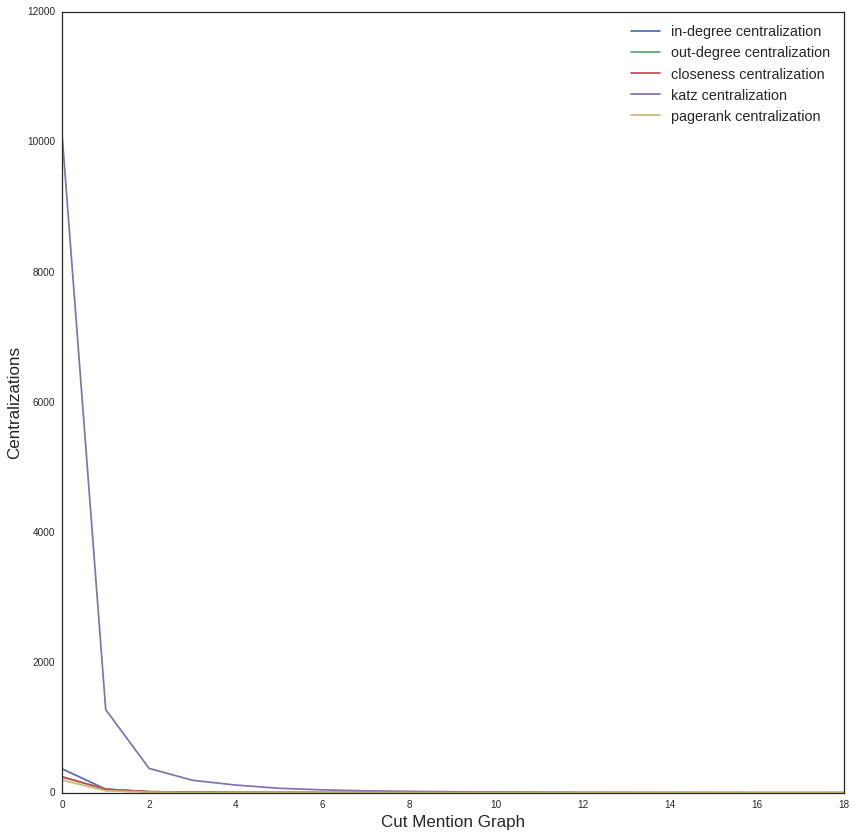

In [86]:
import numpy as np

plt.figure(figsize=(14,14))
x=np.arange(19)
y1 = cdf["in-degree centralization"]
y2 = cdf["out-degree centralization"]
# y3= cdf["betweenness centralization"]
y4= cdf["closeness centralization"]
y5= cdf["katz centralization"]
# y5= cdf["eigenvector centralization"]
y6= cdf["pagerank centralization"]
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y4)
# plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.legend(['in-degree centralization', 'out-degree centralization', 'closeness centralization', 'katz centralization','pagerank centralization'], loc='upper right')

aaaa=plt.legend(loc=1, fontsize = 'x-large')
aaa=plt.xlabel('Cut Mention Graph',fontsize=17)
aa=plt.ylabel('Centralizations',fontsize=17)
a=plt.xlim([0,18])

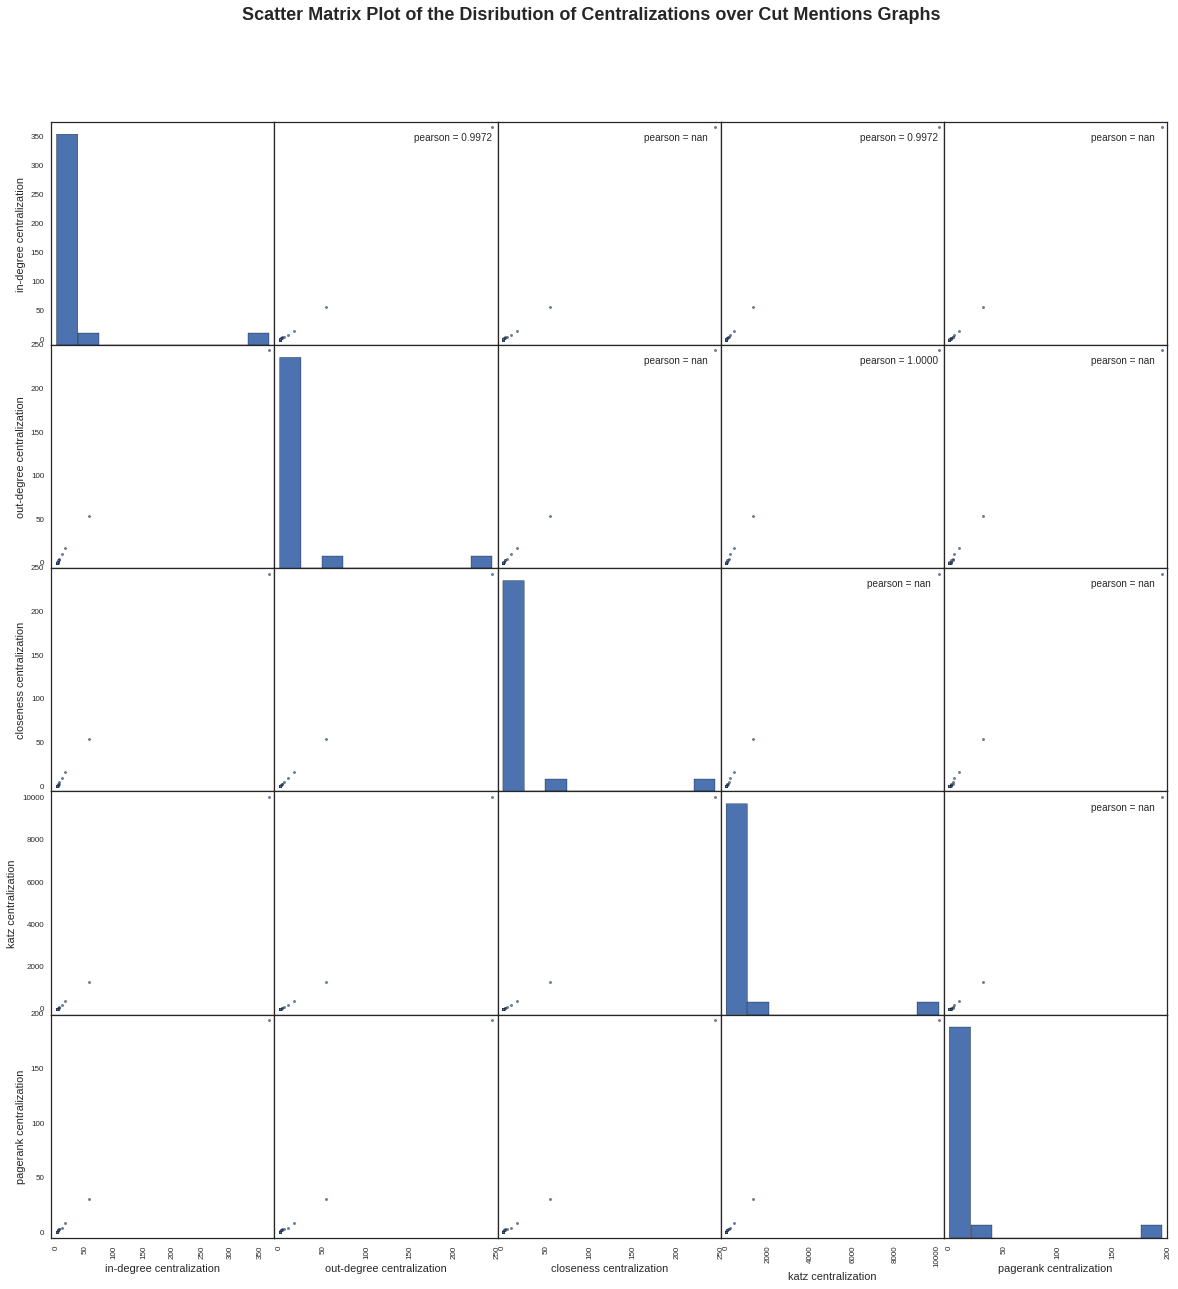

In [87]:
import warnings
warnings.filterwarnings("ignore")
ntei='Scatter Matrix Plot of the Disribution of Centralizations over Cut Mentions Graphs' 
f, ax = plt.subplots(figsize=(20,20))
sss=scatter_matrix(cdf[['in-degree centralization', 'out-degree centralization', 'closeness centralization', 'katz centralization','pagerank centralization']], alpha=0.9, color='black', diagonal='hist',ax=ax)
plt.suptitle(ntei,fontsize=18,fontweight='bold')
corr = cdf.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(sss, k=1)):
    sss[i, j].annotate("pearson = %.4f" %corr[i,j], (0.8, 0.93), xycoords='axes fraction', ha='center', va='center')

In [98]:
def create_centralities_list(G,maxiter=2000,pphi=5,centList=[]):
    if len(centList)==0:
        centList=['degree','closeness','Katz','PageRank']
    cenLen=len(centList)
    valus={}
    for uu,centr in enumerate(centList):
        if centr=='degree':
            if isinstance(G,nx.DiGraph):
                cent=nx.in_degree_centrality(G)
                sstt='In Degree Centralities '
                valus['in_degree']=cent
                cent=nx.out_degree_centrality(G)
                sstt+= 'and Out Degree Centralities'
                valus['out_degree']=cent
            else:
                cent=nx.degree_centrality(G)
                sstt='Degree Centralities'
                ssttt='degree centrality'
                valus[centr]=cent
        elif centr=='closeness':
            cent=nx.closeness_centrality(G)
            sstt='Closeness Centralities'
            ssttt='closeness centrality'
            valus[centr]=cent
        elif centr =='load':
            cent=nx.load_centrality(G)
            sstt='Load Centraities'
            valus[centr]=cent
        elif centr == 'communicability':
            if not isinstance(G, nx.DiGraph):
                cent=nx.communicability_centrality(G)
                sstt='Communicability Centralities'
                valus[centr]=cent
        elif centr=='betweenness':
            cent=nx.betweenness_centrality(G)
            sstt='Betweenness Centralities'
            ssttt='betweenness centrality'
            valus[centr]=cent
        elif centr=='current flow':
            if not isinstance(G, nx.DiGraph):
            
                cent=nx.current_flow_closeness_centrality(G)
                sstt='Current Flow Closeness Centrality'
                valus[centr]=cent
        elif centr=='eigenvector':
            try:
                cent=nx.eigenvector_centrality(G,max_iter=maxiter)
                sstt='Eigenvector Centralities'
                ssttt='eigenvector centrality'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='Katz':
            phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
#             cent=nx.katz_centrality_numpy(G,1/phi-0.01)
#             cent=nx.katz_centrality_numpy(G,.05)#,1/phi-0.01)
            cent=nx.katz_centrality(G,1/phi-0.01)
            sstt='Katz Centralities'
            ssttt='Katz centrality'
            valus[centr]=cent

        elif centr=='PageRank':
            try:
                cent=nx.pagerank(G)
                sstt='PageRank'
                ssttt='pagerank'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='HITS':
            if isinstance(G,nx.DiGraph):
                dd=nx.hits(G,max_iter=maxiter)
                sstt='HITS hubs '
                valus['HITS_hubs']=dd[0]
                sstt+= 'and HITS authorities'
                valus['HITS_auths']=dd[1]
            else:
                dd=nx.hits(G,max_iter=maxiter)
                cent=nx.degree_centrality(G)
                sstt='HITS'
                ssttt='HITS Centralities'
                valus[centr]=dd[0]
        print '%s done!!!' %sstt
    return valus

In [99]:
G=GG[1]
central_pd=pd.DataFrame(create_centralities_list(G))

In Degree Centralities and Out Degree Centralities done!!!
Closeness Centralities done!!!
Katz Centralities done!!!
PageRank done!!!


In [100]:
central_pd.describe()

,Katz,PageRank,closeness,in_degree,out_degree
count,23868.000000,23868.000000,23868.000000,23868.000000,23868.000000
mean,0.002232,0.000042,0.000039,0.000039,0.000039
std,0.006076,0.000130,0.000101,0.000266,0.000101
min,0.001360,0.000027,0.000000,0.000000,0.000000
25%,0.001360,0.000027,0.000000,0.000000,0.000000
50%,0.001360,0.000027,0.000042,0.000000,0.000042
75%,0.002186,0.000035,0.000042,0.000042,0.000042
max,0.423786,0.007863,0.010265,0.015377,0.010265


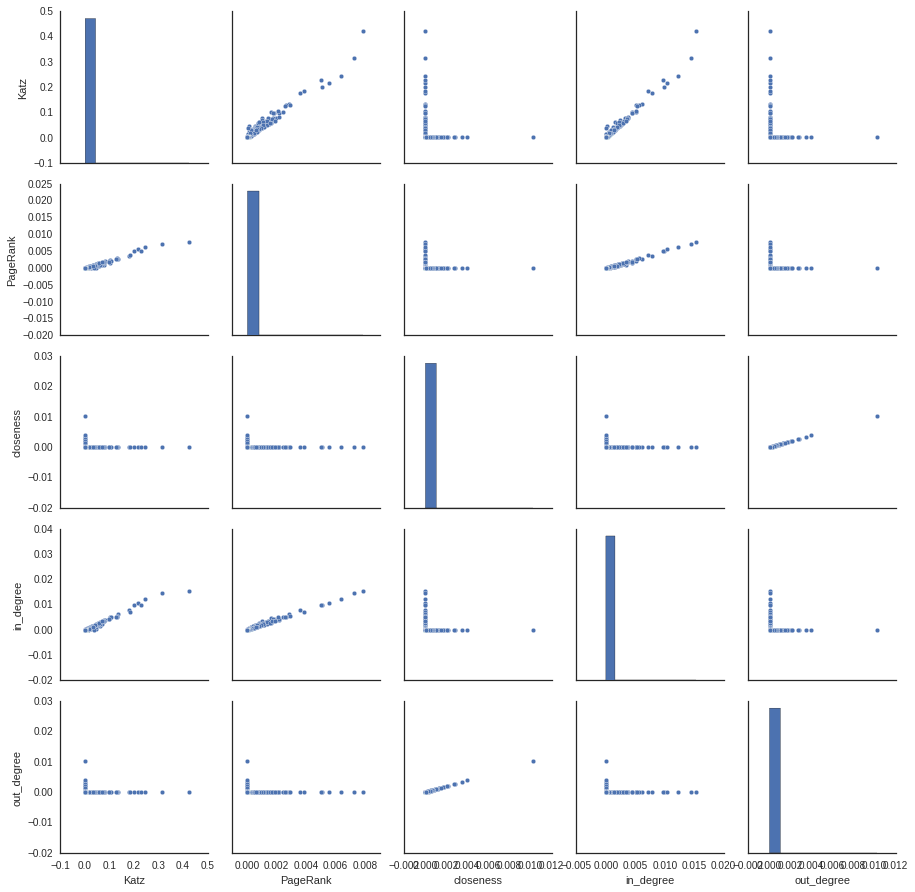

In [105]:
los=sns.pairplot(central_pd)

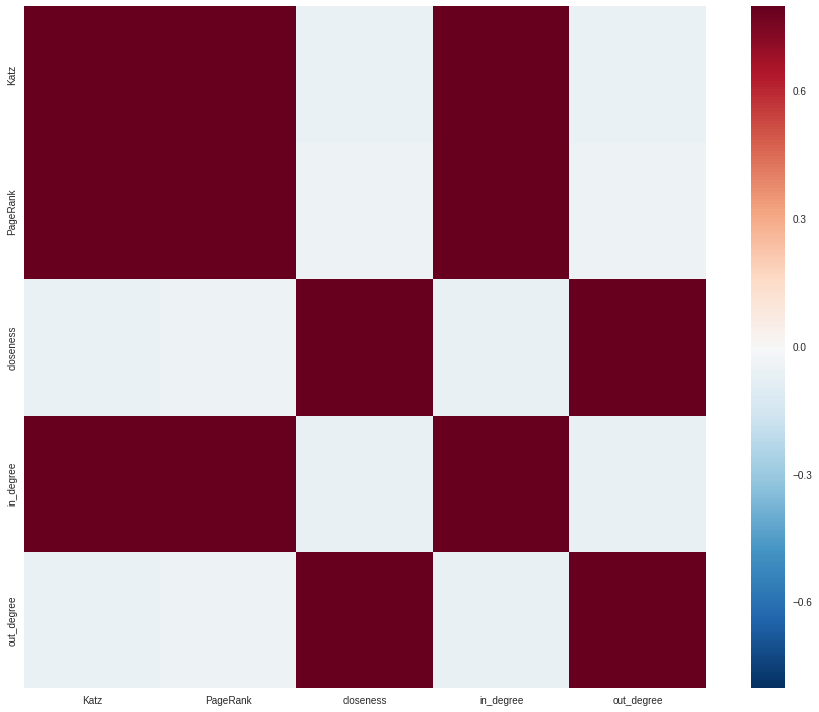

In [106]:
corrmat = central_pd.corr()

f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()